In [11]:
from map_manager.map_generator import map
from map_manager.noise import toddler
from map_manager.map_attributer import average_cells, fill_cells, histeq, view_noises
from tools.utils import ranger, map_attribute_checker
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
deniz = map()
deniz.populate_map(n_locations=512, name="terrain",relaxed=True,k=100)

array([[  4,   4,   4, ...,   6,   6,   6],
       [  4,   4,   4, ...,   6,   6,   6],
       [  4,   4,   4, ...,   6,   6,   6],
       ...,
       [118, 118, 118, ...,   2,   2,   2],
       [118, 118, 118, ...,   2,   2,   2],
       [118, 118, 118, ...,   2,   2,   2]], dtype=uint32)

In [3]:
def view_attributer(map,double=True, size=1024,seed_1=20,seed_2=30,attr_names=[],alpha=0.33, map_name=""):

    map_1 = toddler(size, 2, seed_1)
    uniform_map_1 = histeq(map_1, alpha=alpha)
    cells_1 = average_cells(map.views[map_name], uniform_map_1)
    map_1 = fill_cells(map.views[map_name], cells_1)
    map_1_range = [np.amax(map_1),np.amin(map_1)]

    if double:

        map_2 = toddler(size, 2, seed_2)
        uniform_map_2 = histeq(map_2, alpha=alpha)
        cells_2 = average_cells(map.views[map_name], uniform_map_2)
        map_2 = fill_cells(map.views[map_name], cells_2)
        map_2_range = [np.amax(map_2),np.amin(map_2)]

    

    return map_1, map_2, map_1_range, map_2_range


In [4]:
map_1, map_2, map_1_range, map_2_range = view_attributer(deniz,map_name="terrain")


/Users/cetiners/Desktop/Thesis/human_error/map_manager/map_attributer.py:47: RuntimeWarning: invalid value encountered in true_divide
  average = sum_/count


In [5]:
new_map = map_attribute_checker(map_1, map_2, map_1_range, map_2_range,map_name="terrain")

In [9]:
view_noises

{'terrain': {'atr': {'tundra': [0, 0],
   'rainforest': [2, 2],
   'desert': [0, 2],
   'grassland': [1, 1],
   'mountain/rocky': [1, 0],
   'forest': [1, 2],
   'wetland': [2, 1],
   'drought': [0, 1],
   'mountain/forest': [2, 0]},
  'interval': 3,
  'atr_names': ['rain', 'heat'],
  'atr_list': ['tundra',
   'rainforest',
   'desert',
   'grassland',
   'mountain/rocky',
   'forest',
   'wetland',
   'drought',
   'mountain/forest']}}

In [57]:
cmap = ["blue",'#ffffff',
   '#1bba18',
   '#fffd00',
   '#1bff00',
   '#787878',
   '#06c10d',
   '#1bff00',
   '#fffd00',
   '#77a171']
boundaries = [i/9 for i in [0,1,2,3,4,5,6,7,8,9]]

Text(0.5, 1.0, 'Biomes')

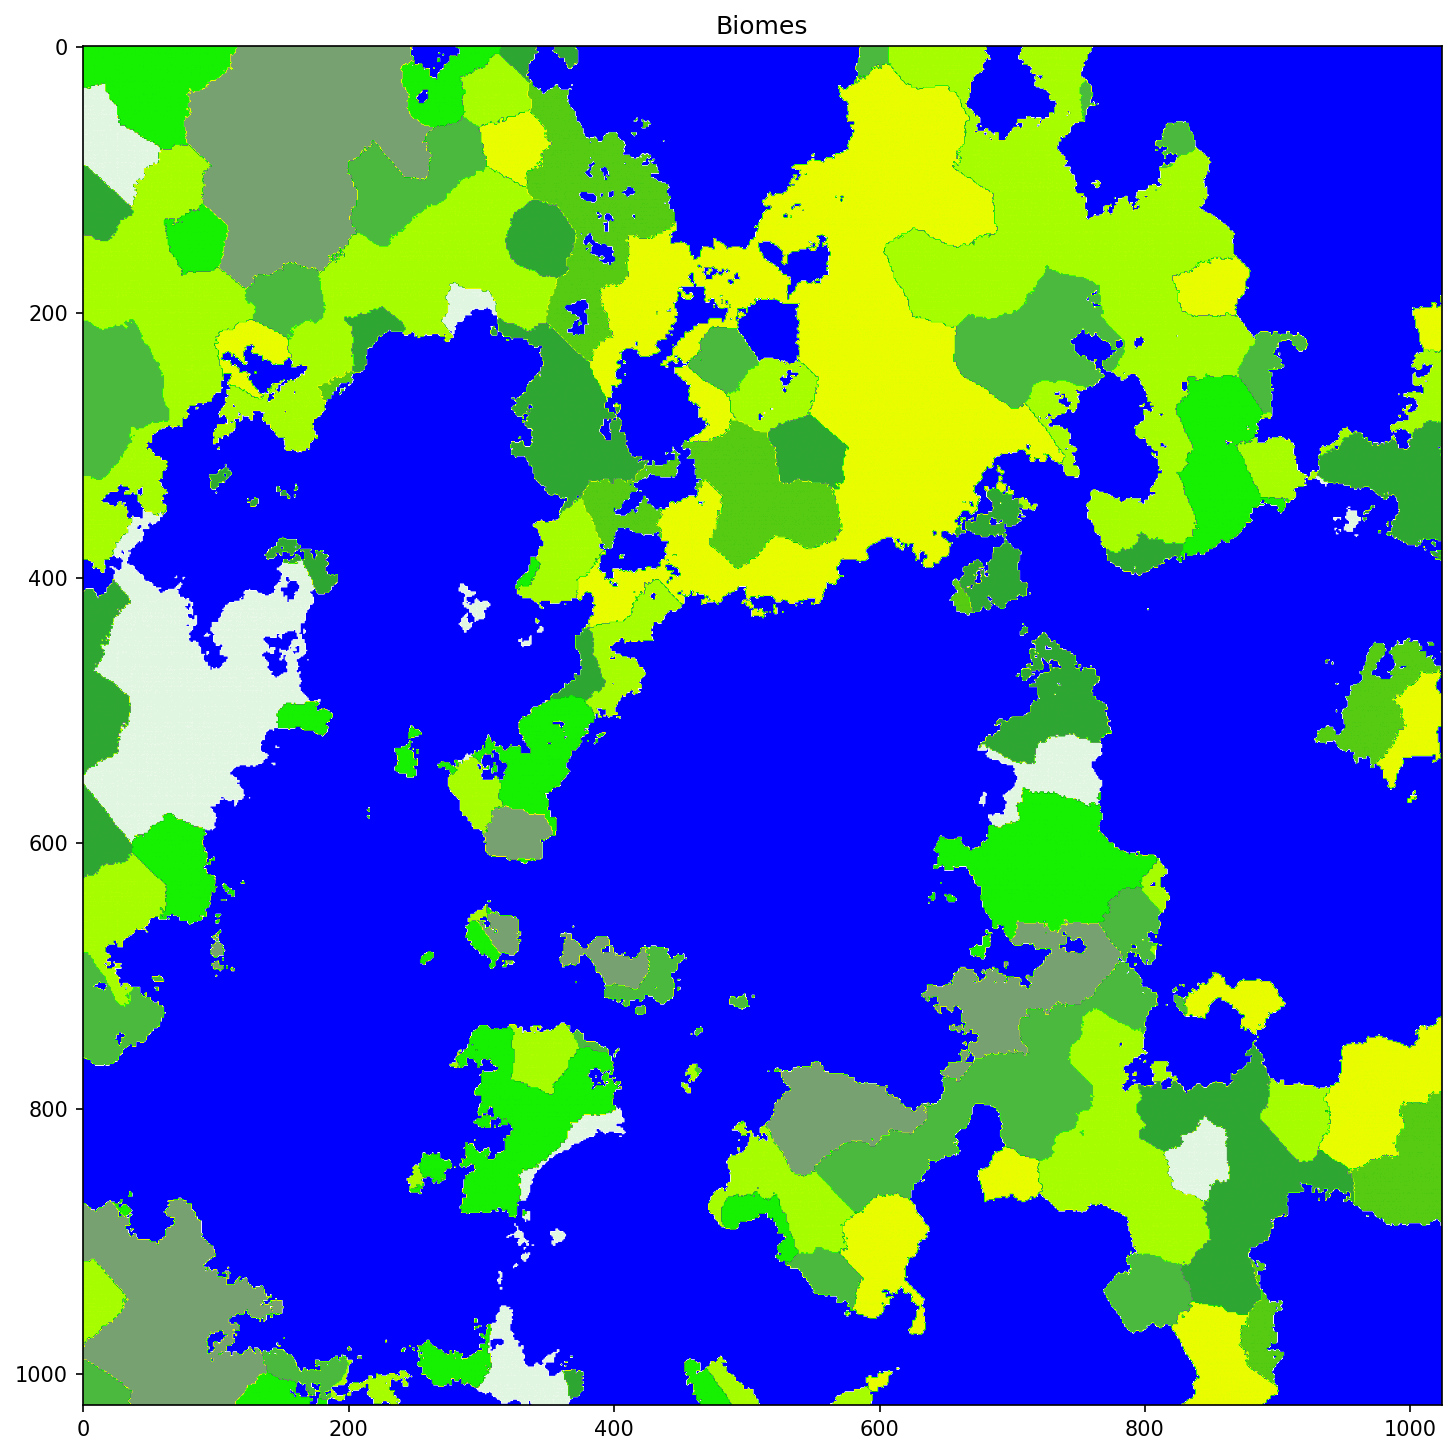

In [58]:
import random
seed=random.randint(1,100)
res=2
octaves = 20
persistence = 0.60
lacunarity = 2
mask = toddler(size=1024, seed=seed,res=res, octaves = octaves, persistence = persistence, lacunarity = lacunarity,mask=True)



import matplotlib

cvals  = boundaries
clr  = cmap
tuples = list(zip(cvals, clr))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

fig, ax = plt.subplots(1,1)
fig.set_dpi(150)
fig.set_size_inches(12, 12)

ax.imshow(new_map*mask, cmap=cmap)
ax.set_title("Biomes")


In [46]:
mask

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])